In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import sklearn 
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline
import matplotlib.pyplot as plt

## Đọc dữ liệu

In [2]:
data = pd.read_csv("train.csv")
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,16,123,124,128,133,137,143,147,151,156,...,16,17,17,17,13,38,212,219,218,219
1,0,141,142,143,145,147,149,150,151,151,...,180,179,180,180,181,181,182,182,182,184
2,8,217,218,218,218,218,218,217,218,217,...,239,241,239,239,237,235,233,232,231,228
3,4,214,215,217,216,217,217,218,218,220,...,74,233,255,255,255,255,255,255,255,255
4,10,134,137,140,142,144,145,145,147,148,...,213,210,211,211,211,209,208,208,208,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,12,186,187,190,194,197,198,200,202,204,...,196,184,167,125,202,246,237,238,238,238
26996,7,205,206,207,206,207,208,208,207,208,...,172,175,183,186,181,183,193,172,159,179
26997,13,145,154,159,164,169,172,175,177,180,...,232,233,235,236,237,237,238,239,239,239
26998,23,118,122,126,128,131,132,133,134,134,...,191,202,201,201,201,202,201,200,199,199


## Hiển thị một số hình ảnh và nhãn

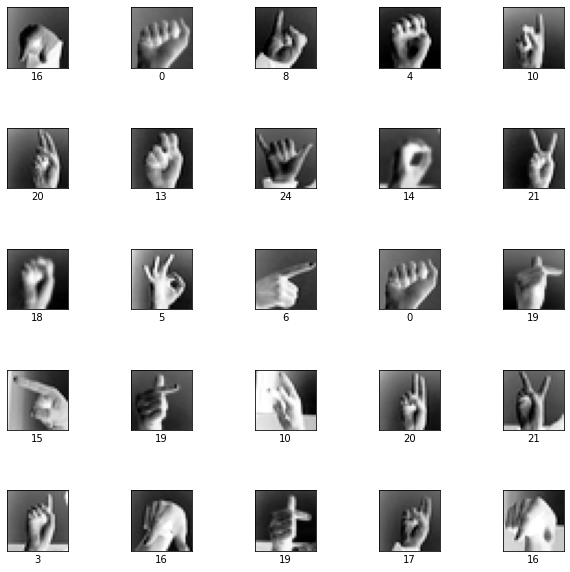

In [3]:
numbers_image = 25

# Số ô giữ hình
cells = math.ceil(math.sqrt(numbers_image))

# tăng kích thước ô hình
plt.figure(figsize=(10, 10))

for index in range(numbers_image):
    # Dữ liệu ảnh
    value = data[index : index + 1].values
    digit_pixels = value[0][1:]

    # Tính size ảnh
    image_size = int(math.sqrt(digit_pixels.shape[0]))
    
    # Chuyển vector sang matrix
    matrix = digit_pixels.reshape((image_size, image_size))
    #value[0][0]
    # Plot dữ liệu matrix
    plt.subplot(cells, cells, index + 1)
    plt.imshow(matrix, cmap='Greys')
    plt.xlabel(value[0][0])
    plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

# Hiển thị ảnh
plt.subplots_adjust(hspace=1, wspace=1)
plt.show()

## Chuyển dữ liệu về các vector số thực

In [4]:
X = data.values[:, 1:]
Y = data.values[:, [0]]

 Training và Test


pd_train = data.sample(frac=0.8)
pd_test = data.drop(pd_train.index)

train_data = pd_train.values
test_data = pd_test.values

x_train = train_data[:, 1:]
y_train = train_data[:, [0]]

x_test = test_data[:, 1:]
y_test = test_data[:, [0]]

## Xử lí dữ liệu

[Để làm mẫu mấy cách khác = có làm nhiều](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)

In [5]:
def process_MinMaxScaler(X):
    return preprocessing.MinMaxScaler().fit_transform(X)

def process_other(X):
    something = 0
    return something

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

In [7]:
X_train = process_MinMaxScaler(X_train)
X_train.shape

(21600, 784)

## Train model

### Sử dụng Stochastic Average Gradient, max_iter = 100 (dừng sớm tránh overfit)

In [8]:
model = linear_model.LogisticRegression(fit_intercept=False, solver = "sag")
model.fit(X_train, Y_train[:,0])    

C:\Users\user\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(fit_intercept=False, solver='sag')

## Validation

In [9]:
def model_validation(model, X_train, X_test, Y_train, Y_test):
    in_sample_prediction = model.predict(X_train)
    mse = mean_squared_error(Y_train, in_sample_prediction)
    
    print("In-sample match: ", model.score(X_train, Y_train)*100, "%")
    print("In-sample mse: ", mse)
    print("In-sample rmse: ", np.sqrt(mse))
    print('---------------------------------------')
    prediction = model.predict(X_test)
    mse_out =  mean_squared_error(Y_test, prediction)
    print("Out-sample match: ", model.score(X_test, Y_test)*100, "%")
    print("Out-sample mse: ", mse_out)
    print("Out-sample rmse: ",np.sqrt(mse_out))

In [10]:
X_test = process_MinMaxScaler(X_test)

model_validation(model, X_train, X_test, Y_train, Y_test)

In-sample match:  99.96296296296296 %
In-sample mse:  0.020925925925925924
In-sample rmse:  0.14465796184768373
---------------------------------------
Out-sample match:  99.96296296296296 %
Out-sample mse:  0.031296296296296294
Out-sample rmse:  0.17690759253434063


# Những cách xử lí không chọn